In [20]:
# Import Libraries
import sys
import glob, os

from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import skimage.measure
import skimage.measure

In [21]:
# Setup paths and import local libraries
if "has_changed_dir" not in globals():
    # Change directory only the first time
    %cd ../../
    # Set the flag to indicate the change has been made
    has_changed_dir = True
%ls ..

'Equalized Color '$'\n''Roadmap Images.png'        SkyAI-Mapper/
'Equalized Gray Scale '$'\n''Roadmap Images.png'   SkyAI-Sim/
'Gray Scale '$'\n''Roadmap Images.png'             VBN_backup/
 Memphis_wrong/                                    msfs2020-map-enhancement/
 SkyAI/


In [22]:
prj_path = Path('SkyAI-Sim')
sys.path.insert(0, str(prj_path))
from src.utils import img_helper
from src.utils.io_helper import str_to_floats
from src.utils import consts
from src.data.skyai import SkyAI
from src.utils import io_helper

In [23]:
args = consts.ARGS
args.data_dir = 'dataset/Memphis'
args.coords =  str_to_floats("35.16_-89.9_35.115_-89.823_120.0")
args

Namespace(coords=[35.16, -89.9, 35.115, -89.823, 120.0], fov=78.8, aspect_ratio=[4, 3], map_type='satellite', dataset='SkyAI', data_dir='dataset/Memphis', img_size=[400, 400, 3], overlap=0, batch_size=8, seed=2024, utm='EPSG:32616')

In [24]:
aerial_data = SkyAI(args=args,
        map_type='roadmap',
        data_dir=args.data_dir,
        overlap=args.overlap
        )
aerial_data.config(download_raster=False)


Checking folder:
	 dataset/Memphis/roadmap Folder Exists.

--------------------------------------------------------------

Data detailed values before download:

--------------------------------------------------------------
namespace(args={'coords': [35.16, -89.9, 35.115, -89.823, 120.0],
                'fov': 78.8,
                'aspect_ratio': [4, 3],
                'map_type': 'satellite',
                'dataset': 'SkyAI',
                'data_dir': 'dataset/Memphis',
                'img_size': [400, 400, 3],
                'overlap': 0,
                'batch_size': 8,
                'seed': 2024,
                'utm': 'EPSG:32616'},
          filename='log_2025-01-15_14-21-38.txt',
          top_left=namespace(lat=35.16,
                             lon=-89.9,
                             x_utm=235848.057,
                             y_utm=3894638.245),
          bottom_right=namespace(lat=35.115,
                                 lon=-89.823,
                         

1.584962500721156


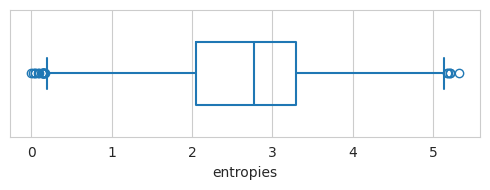

In [25]:
plt.rcParams["figure.figsize"] = [5, 2]
plt.rcParams["figure.autolayout"] = True
sns.set_style("whitegrid")
sns.boxplot(aerial_data.meta_df, x='entropies', width=0.5, orient='h', fill=False, dodge=False)
print(aerial_data.meta_df['entropies'].quantile(0.1))
# plt.yticks(np.arange(1, 5, 0.1))

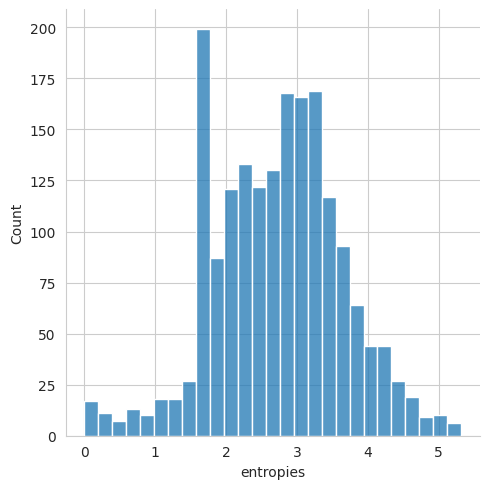

In [26]:
plt.rcParams["figure.figsize"] = [5, 5.50]
plt.rcParams["figure.autolayout"] = True
sns.set_style("whitegrid")
sns.displot(data=aerial_data.meta_df, x='entropies')
# plt.yticks(np.arange(1, 5, 0.1))

In [27]:
nx = 5
ny = 4
seed = 4


PosixPath('dataset/Memphis/roadmap/raster_images_35.1375_-89.8615_0_120.0_78.8_4_4')

1849
3


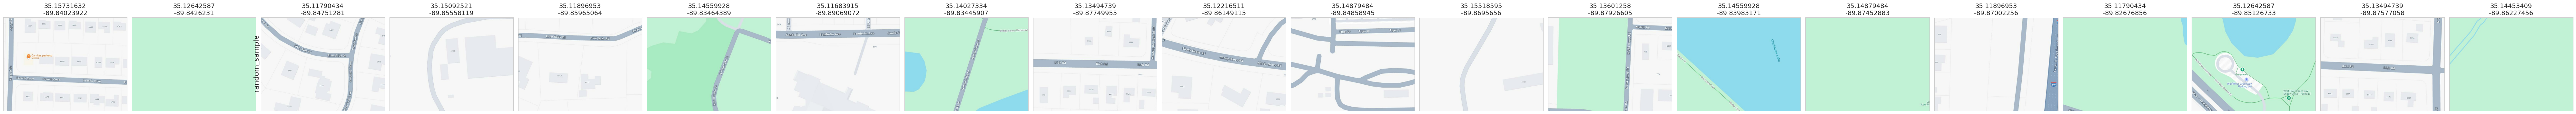

In [28]:
aerial_imgs_path = glob.glob(os.path.join(aerial_data.data_dir / aerial_data.data_info['x'], "*.jpg"))
aerial_imgs_path.sort()
print(len(aerial_imgs_path))
aerial_imgs, aerial_titles = img_helper.choose_random_images(nx*ny,
                                                            aerial_imgs_path,
                                                            output_dir=aerial_data.data_dir / 'random_sample',
                                                            obj=aerial_data,
                                                            seed=seed)

3


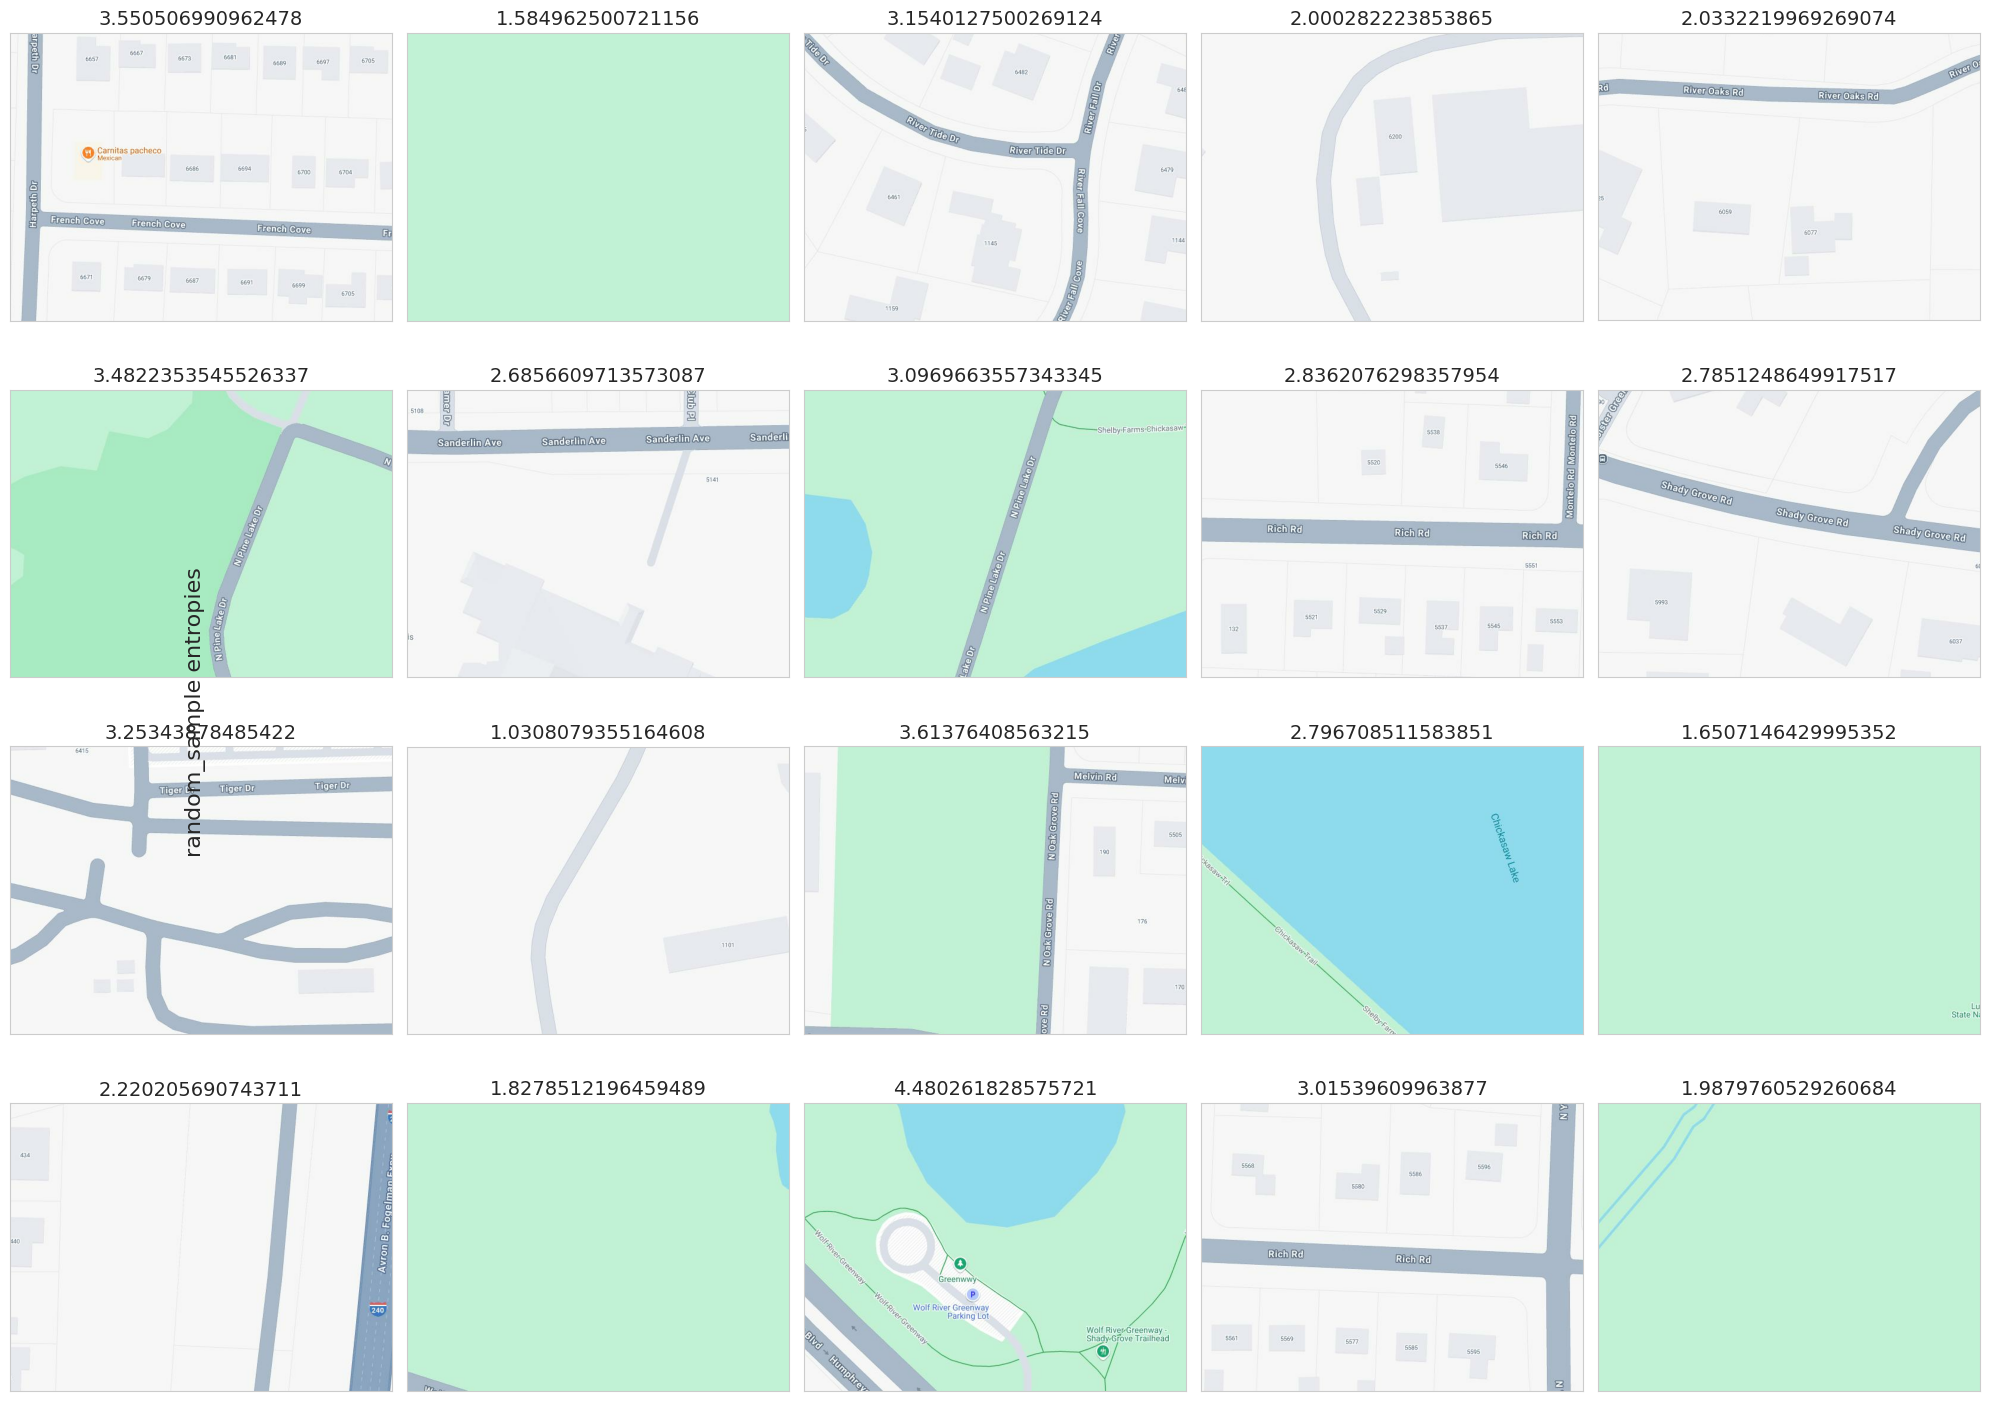

In [29]:
entropys = [skimage.measure.shannon_entropy(img) for img in aerial_imgs]

img_helper.plot_multy(
    aerial_imgs,
    aerial_data.data_dir /'random_sample entropies',
    nx, ny, entropys)